<a href="https://colab.research.google.com/github/zar373/Loan_Prediction/blob/main/Loan_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
trainm= pd.read_csv('/content/sample_data/train_modified.csv')
testm= pd.read_csv('/content/sample_data/test_modified.csv')

In [ ]:
trainm.drop('Unnamed: 0',axis=1,inplace=True)
testm.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
model_acc=[]

trainm.columns

Index(['Credit_History', 'Loan_Status', 'logLoanAmount', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'logTotalIncome', 'EMI', 'Balance_Income'],
      dtype='object')

In [ ]:
X= trainm.drop('Loan_Status', axis= 1)
y= trainm.Loan_Status

##Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

##Logistics Regression

In [ ]:
i= 1
LogReg_acc= []
kf= StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
  print('\n{}  of kfold{}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]

  LogReg= LogisticRegression(random_state=1, max_iter= 200)
  LogReg.fit(xtr, ytr)
  pred_test= LogReg.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test)
  LogReg_acc.append(score)
  print('accuracy score', score)
  i +=1
  pred_test= LogReg.predict(testm)

LogReg_acc= np.array(LogReg_acc)
LogReg_accm= LogReg_acc.mean()
model_acc.append(LogReg_accm)
print(LogReg_accm)


1  of kfold5
accuracy score 0.7967479674796748

2  of kfold5
accuracy score 0.8373983739837398

3  of kfold5
accuracy score 0.6666666666666666

4  of kfold5
accuracy score 0.7804878048780488

5  of kfold5
accuracy score 0.7950819672131147
0.7752765560442489


##Decision Tree

In [ ]:
from sklearn import tree

i= 1
DecTre_acc= []
kf= StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)
for train_index, test_index in kf.split(X, y):
  print("\n{} of fold {}".format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]

  DecTre= tree.DecisionTreeClassifier(random_state= 1)
  DecTre.fit(xtr, ytr)
  pred_test= DecTre.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test)
  DecTre_acc.append(score)
  print('accuracy score', score)
  i +=1
  pred_test= DecTre.predict(testm)
  # print(pred_test)

DecTre_acc= np.array(DecTre_acc)
DecTre_accm= DecTre_acc.mean()
model_acc.append(DecTre_accm)
print(DecTre_accm)


1 of fold 5
accuracy score 0.7723577235772358

2 of fold 5
accuracy score 0.7235772357723578

3 of fold 5
accuracy score 0.7073170731707317

4 of fold 5
accuracy score 0.7235772357723578

5 of fold 5
accuracy score 0.6721311475409836
0.7197920831667333


##Random Forest Classifier

In [ ]:
i=1
for train_index, test_index in kf.split(X,y):
  kf = StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)
  print('/n{} of fold{}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]
  RandFor= RandomForestClassifier(random_state= 1)
  RandFor.fit(xtr, ytr)
  pred_test_Rand= RandFor.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test_Rand)
  print('accuracy score', score)
  i+=1

pred_test= RandFor.predict(testm)
unique_val, count= np.unique(pred_test, return_counts=True)
print(f"the value is {unique_val[0]} and it's count is {count[0]}")
print(f"the value is {unique_val[1]} and it's count is {count[1]}")

/n1 of fold5
accuracy score 0.8292682926829268
/n2 of fold5
accuracy score 0.7886178861788617
/n3 of fold5
accuracy score 0.7886178861788617
/n4 of fold5
accuracy score 0.8130081300813008
/n5 of fold5
accuracy score 0.7540983606557377
the value is 0 and it's count is 80
the value is 1 and it's count is 287


##Tuning Parameters with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
"""
max depth= maximum depth of the tree
n_estimators= number of trees in the forest
cv= no of folds.
refit= accuracy is optimized
f1_macro is monitered
"""

paramgrid= {
    'max_depth': list(range(1, 20, 2)),
    'n_estimators': list(range(1, 100, 20))
}

grid_search= GridSearchCV(RandomForestClassifier(random_state= 1), paramgrid, cv= 5, scoring=['f1_macro', 'accuracy'], refit= 'accuracy')

# X_train, X_cv, y_train, y_cv= train_test_split(X, y, test_size= 0.3, random_state= 1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 7, 'n_estimators': 41}
0.7904240766073871


##Tunning of Random Forest Hyperparameters

In [ ]:
grid_search1= GridSearchCV(
    estimator=RandomForestClassifier(bootstrap= True, class_weight= None, criterion= 'entropy',
                                     max_depth= None, max_features= 'log2', max_leaf_nodes= None,
                                     min_impurity_decrease= 0.0, min_samples_leaf= 1,
                                     min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                                     n_estimators= 100, oob_score= False, warm_start= False,
                                     verbose= 0, n_jobs= 1, random_state=1),
    param_grid= {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 100, 20))},
    scoring= None, refit= 'True',  cv= None, n_jobs= 1, return_train_score= True, error_score= 'raise', verbose= 0
)


grid_search1.fit(X_train, y_train)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='log2', n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81]},
             refit='True', return_train_score=True)

##Final Random Forest Model

In [ ]:
i= 1
RandFor_acc= []
kf= StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)
for train_index, test_index in kf.split(X,y):
  print('\n{} of KFold{}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]
  RandFor_model= RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=41, n_jobs=1, random_state=1)
  RandFor_model.fit(xtr, ytr)
  pred_test= RandFor_model.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test)
  RandFor_acc.append(score)
  print('accuracy score', score)
  i+=1
  pred_test= RandFor_model.predict(testm)

RandFor_acc= np.array(RandFor_acc)
RandFor_accm= RandFor_acc.mean()
model_acc.append(RandFor_accm)
print(RandFor_accm)


1 of KFold5
accuracy score 0.8130081300813008

2 of KFold5
accuracy score 0.8292682926829268

3 of KFold5
accuracy score 0.7723577235772358

4 of KFold5
accuracy score 0.7967479674796748

5 of KFold5
accuracy score 0.7868852459016393
0.7996534719445555


##Feature Importance

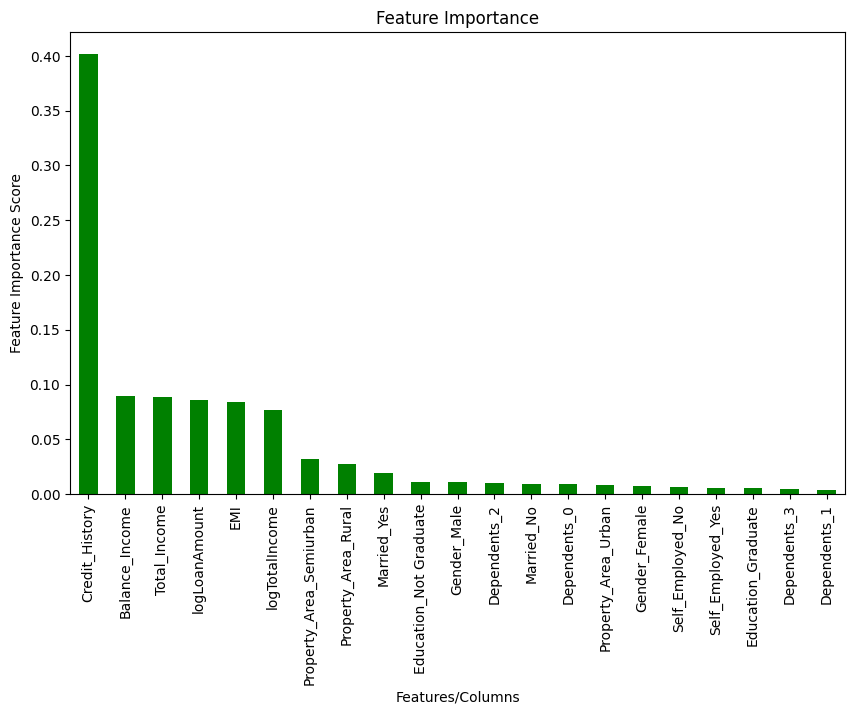

In [ ]:
plt.figure(figsize= (10, 6))
imp= pd.Series(RandFor_model.feature_importances_, index= X.columns).sort_values(ascending= False)
imp.plot(kind= 'bar', title= 'Feature Importance', color= 'green')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features/Columns')
plt.show()

##XGBoost

In [ ]:
from xgboost import XGBClassifier

i=1
kf =StratifiedKFold(n_splits=5, shuffle= True, random_state= 1)
for train_index, test_index in kf.split(X,y):
  print('\n{} of KFold{}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]
  xgb_model= XGBClassifier(random_state= 1, n_estimators= 55, max_depth= 2)
  xgb_model.fit(xtr, ytr)
  pred_test_1= xgb_model.predict(xvl)
  score_1= metrics.accuracy_score(yvl, pred_test_1)
  print('accuracy score', score_1)
  i+=1
  pred_test= xgb_model.predict(testm)



1 of KFold5
accuracy score 0.8130081300813008

2 of KFold5
accuracy score 0.8048780487804879

3 of KFold5
accuracy score 0.7967479674796748

4 of KFold5
accuracy score 0.7886178861788617

5 of KFold5
accuracy score 0.7868852459016393


##Tunning of XGBoost Hyperparameters

In [ ]:
grid_search2= GridSearchCV(
    estimator=XGBClassifier(random_state= 1),
    param_grid= {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 100, 20))},
    scoring= None, refit= 'True',  cv= None, n_jobs= 1, return_train_score= True, error_score= 'raise', verbose= 0
)

grid_search2.fit(X_train, y_train)
print(grid_search2.best_params_)

{'max_depth': 1, 'n_estimators': 21}


##Final XGBoost Hyperparameters

In [ ]:
i=1
xgb_acc= []
kf =StratifiedKFold(n_splits=5, shuffle= True, random_state= 1)
for train_index, test_index in kf.split(X,y):
  print('\n{} of KFold{}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]
  xgb_model= XGBClassifier(random_state= 1, n_estimators= 61, max_depth=1 )
  xgb_model.fit(xtr, ytr)
  pred_test_1= xgb_model.predict(xvl)
  score_1= metrics.accuracy_score(yvl, pred_test_1)
  xgb_acc.append(score_1)
  print('accuracy score', score_1)
  i+=1
  pred_test= xgb_model.predict(testm)

xgb_acc= np.array(xgb_acc)
xgb_accm= xgb_acc.mean()
model_acc.append(xgb_accm)
print(xgb_accm)


1 of KFold5
accuracy score 0.8048780487804879

2 of KFold5
accuracy score 0.8211382113821138

3 of KFold5
accuracy score 0.8048780487804879

4 of KFold5
accuracy score 0.8048780487804879

5 of KFold5
accuracy score 0.7868852459016393
0.8045315207250432


##Feature Importance

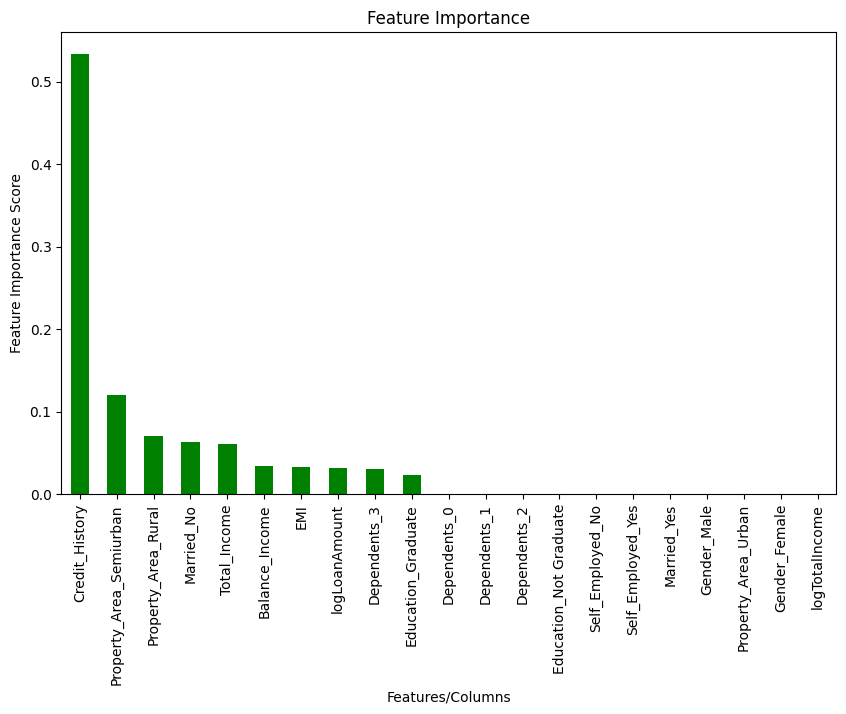

In [ ]:
plt.figure(figsize= (10, 6))
imp_xgb= pd.Series(xgb_model.feature_importances_, index= X.columns).sort_values(ascending= False)
imp_xgb.plot(kind= 'bar', title= 'Feature Importance', color= 'green')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features/Columns')
plt.show()

##Model Accuracy

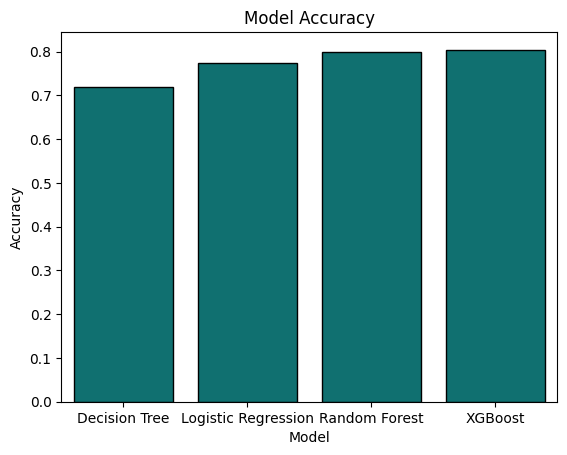

In [ ]:
model= ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]
mod_df= pd.DataFrame({'Model': model, 'Accuracy': model_acc})
mod_df.sort_values(by= 'Accuracy', ascending= True, inplace= True)

sns.barplot(x= 'Model', y= 'Accuracy', data= mod_df, color= 'teal', edgecolor= 'black')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(LogReg, "LogReg.joblib")
joblib.dump(DecTre, "DecTre.joblib")
joblib.dump(RandFor_model, "RandFor_model.joblib")
joblib.dump(xgb_model, "xgb_model.joblib")

['xgb_model.joblib']